In [125]:
#Import the needed libraries

In [3]:
import pip

import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Install wordcloud

In [5]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\paula\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Load data into Pandas dataframe.

df = pd.read_csv("C:\\Users\paula\\Downloads\\OneDrive_1_7-31-2021\\winemag-data_first150k.csv")

In [7]:
#Print data
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [8]:
#Print data Structure

print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 150930 observations and 11 features in this dataset. 

There are 632 types of wine in this dataset such as Cabernet Sauvignon, Tinta de Toro, Sauvignon Blanc, Pinot Noir, Provence red blend... 

There are 49 countries producing wine in this dataset such as US, Spain, France, Italy, New Zealand... 



In [9]:
#Print first 5 columns

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [10]:
#Print description Column

description = df["description"]
print(description)

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150925    Many people feel Fiano represents southern Ita...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
150929    More Pinot Grigios should taste like this. A r...
Name: description, Length: 150930, dtype: object


In [11]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries points and wine prices to find the ones with the most expensive wines.
country.describe().head()



Unnamed: 0                                      \
                            count          mean           std     min   
country                                                                 
Albania                       2.0   4753.000000    156.977705  4642.0   
Argentina                  5631.0  80834.275617  41920.827687    60.0   
Australia                  4957.0  90585.526932  43326.188557    61.0   
Austria                    3057.0  70144.829899  44432.186559   582.0   
Bosnia and Herzegovina        4.0  56937.750000  41678.036193  7520.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Albania                  4697.50   4753.0    4808.5    4864.0     2.0   
Argentina               46176.50  83505.0  117693.5  149638.0  5631.0   
Australia               57427.00  99866.0  129221.0  150854.0  4957.0   
Austria                 29105.00  66552.0  109441.0  149531.0  3057.0   
Bosnia and Herzegovina  29872.25  63944.0   91009.5   92343.0     4.0   

                                   ...                 price             \
                             mean  ...    75%    max   count       mean   
country                            ...                                    
Albania                 88.000000  ...  88.00   88.0     2.0  20.000000   
Argentina               85.996093  ...  88.00   97.0  5587.0  20.794881   
Australia               87.892475  ...  90.00  100.0  4894.0  31.258480   
Austria                 89.276742  ...  91.00   98.0  2483.0  31.192106   
Bosnia and Herzegovina  84.750000  ...  85.75   88.0     4.0  12.750000   

                                                                    
                              std   min    25%   50%   75%     max  
country                                                             
Albania                  0.000000  20.0  20.00  20.0  20.0    20.0  
Argentina               20.186540   4.0  11.00  15.0  20.0   250.0  
Australia               39.008512   5.0  15.00  20.0  34.0   850.0  
Austria                 28.540861   8.0  18.00  25.0  38.0  1100.0  
Bosnia and Herzegovina   0.500000  12.0  12.75  13.0  13.0    13.0  

[5 rows x 24 columns]

In [12]:
?WordCloud

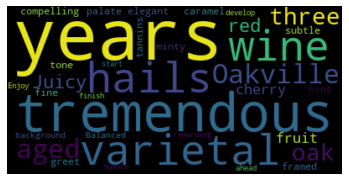

In [13]:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 36430569 words in the combination of all review.


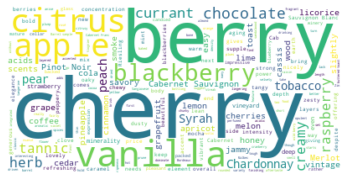

In [44]:
#Use Stop word to seperate all the unwanted words.
stopwords = set(STOPWORDS)
stopwords.update(["drink","tremendous","Oakville","fruit","aged","three","red","Balanced","hails","varietal","compelling","subtle","framed","start","fine",
                  "finish","background","greet","elegant","develop","ahead","now", "wine", "flavor", "flavors","Enjoy","rewarding","aromas","palate","ripe","blend","nose","note",
                  "rich","show","give","one","fresh","light","well","offer","mouth","notes",
                  "shows","clean","offers","touch","hint","good","feel","character","smooth","complex","soft","year","texture","bright","open","open",
                  "bright","oak","balance","full","bodied","taste","mouthfeel","hints","dark","spice",
                  "dry","cup","Tbsp","cup","tsp","small","finely","ground","tsp","ground","lb","plus","white","kosher","1/4","total",
                  "chopped","room","Freshly","temperature","divided","crushed","cup","melted",
                  "temperature","temperature'","chicken","unsalted","cups","flakes",
                  "whole","rosemary","acorn","more","squash","more'",
                "unsalted","salt","pepper'","1/4","quality","allspice'","torn","pieces","medium","oz","sliced'","olive","bread","pink","pepper","chicken","loaf","black","miso'",
                 "chicken'","rosemary'","chicken'","cored","extra","virgin","Pinch","onion","rosemary'","butter","thinly","Lady","studry","flakes","pieces","thinly","Lady","sturdy","pieces'",
                  "pieces","purpose","Gala","1/2","cut","broth","flakes'","flour'","firm","nice","tight","finishes","dense","richness",
                  "1/4","oil'","1/4","1/4","1/4","butter","flakes","1/4","1/4","1/4","3 1/2","2 3/4","1/2","2 1/2","1/4","2 3/4","3 1/2","1/4","2 1/2","1/2"
                 ,"tannin","tannins","make","acidity","long","plum","crisp","fruits","years","made","style","structure","simple",
                  "bit","lot","simple","spicy","mineral","best","acid","yet","hard","fruity","round","come","little","earthy",
                  "imported","much","solid","pretty","delicious","intense","plenty","lively","tastes","powerful","lively","great","green","deliver","young","floral","seem","big",
                  "tropical","ready","along","quite","layer","concentrated","complexity","followed","color","weight","followed",
                  "although","will","bouquet","feels","add","core","leather","herbal","pair",
                  "age","alcohol","showing","sweetness","wines","delivers","almost","still","opens","tone","silky",
                  "stone","attractive","structured","lead","makes","seems","smoky","time","forward","freshness","exotic",
                  "high","toasty","delicate","right","tones","pure","lush","close","heavy","thick","need",
                  "close","bottle","edge","juicy","enough","lots","sharp","tart","polished","scent","sweet"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [209]:
#The next steps repeats the same process for the ingredients dataset representted by the df_i.

In [45]:
#Import Ingredients dataset

df_i = pd.read_csv("C:\\Users\paula\\Downloads\\OneDrive_1_7-31-2021\\Food Ingredients and Recipe Dataset with Image Name Mapping.csv")

In [46]:
#Print dataset
df_i

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...,...
13496,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten..."
13497,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s..."
13498,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...
13499,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...


In [47]:
print("There are {} observations and {} features in this dataset. \n".format(df_i.shape[0],df_i.shape[1]))

#print("There are {} types of wine in this dataset such as {}... \n".format(len(df_i.variety.unique()),
                                                                          # ", ".join(df_i.variety.unique()[0:5])))

#print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df_i.country.unique()),
                                                                                   #   ", ".join(df_i.country.unique()[0:5])))

There are 13501 observations and 6 features in this dataset. 



In [48]:
#Print first 5 rows
df_i.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [58]:
#Print Ingredients column
Ingredients = df_i["Cleaned_Ingredients"]
print(Ingredients)

0        ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...
1        ['2 large egg whites', '1 pound new potatoes (...
2        ['1 cup evaporated milk', '1 cup whole milk', ...
3        ['1 (¾- to 1-pound) round Italian loaf, cut in...
4        ['1 teaspoon dark brown sugar', '1 teaspoon ho...
                               ...                        
13496    ['1 cup all-purpose flour', '2/3 cup unsweeten...
13497    ['1 preserved lemon', '1 1/2 pound butternut s...
13498    ['Leftover katsuo bushi (dried bonito flakes) ...
13499    ['1 stick (1/2 cup) plus 1 tablespoon unsalted...
13500    ['12 medium to large fresh poblano chiles (2 1...
Name: Cleaned_Ingredients, Length: 13501, dtype: object


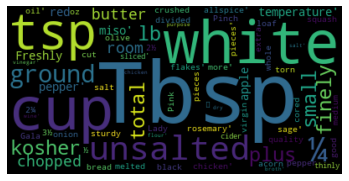

In [85]:
#Creat word_cloud
text = df_i.Cleaned_Ingredients[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
text = " ".join(review for review in df_i.Cleaned_Ingredients)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5671597 words in the combination of all review.


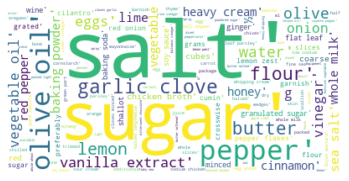

In [93]:
#Create word cloud
stopwords = set(STOPWORDS)
stopwords.update(["white","ground","lb","Tbsp","cup","tsp","finely","plus","ground","plus","1/4","kosher","room","Freshly","temperature","divided","total","squash","acorn","cups","crushed","sage","more","medium","pinch","chopped","Lady","sage","2%","3%","rosemary","miso","allspice","quality","melted","cut","1/4",
                  "unsalted","miso'","small","more'","allspice'","ounce","black","virgin","extra","large","pound",
                  "fresh","thinly","ounces'","teaspoon","juice'","purpose","chopped","tablespoon","temperature","pounds",
                  "sliced","ounces","sliced'","chopped'","oz","stick","tablespoons","optional",
                  "divided","pieces","serving'","flat leaf","head","coarsely", "oil","divided","serving","teaspoon","pieces'",
                  "taste'","brown","temperature","inch", "thick","butter'","divided","divided'","temperature'","grated","gram",
                  "slice","wine","teaspoons","chicken broth'","sticks","salt","dried"])
                 
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()